In [9]:
# Folders names
input_folder  = joinpath(@__DIR__, "inputs")
output_folder = joinpath(@__DIR__, "outputs")

"c:\\github-repos\\generation-expansion-planning-models-jump\\outputs"

In [10]:
# include the file with the functions for the stochastic GEP model
include("Stochastic-GEP.jl")

save_results_to_csv (generic function with 1 method)

In [11]:
# read the data
sets, params = read_data(input_folder)

(Dict{String, Vector}("P" => String3["h01", "h02", "h03", "h04", "h05", "h06", "h07", "h08", "h09", "h10"  …  "h15", "h16", "h17", "h18", "h19", "h20", "h21", "h22", "h23", "h24"], "SC" => String3["sc1", "sc2", "sc3"], "G" => String7["ocgt", "ccgt", "wind", "solar"]), Dict{String, Any}("p_investment_cost" => Dict{String7, Int64}("ccgt" => 40, "ocgt" => 25, "solar" => 50, "wind" => 70), "p_unit_capacity" => Dict{String7, Int64}("ccgt" => 400, "ocgt" => 100, "solar" => 10, "wind" => 50), "p_demand" => Dict{String3, Int64}("h11" => 1010, "h17" => 963, "h09" => 902, "h12" => 1023, "h23" => 1053, "h18" => 997, "h24" => 1035, "h03" => 814, "h08" => 834, "h07" => 779…), "p_availability" => Dict{Tuple{String3, String7, String3}, Float64}(("sc2", "solar", "h18") => 0.03, ("sc2", "solar", "h19") => 0.0, ("sc1", "wind", "h15") => 0.14, ("sc2", "solar", "h24") => 0.0, ("sc1", "solar", "h11") => 0.78, ("sc3", "wind", "h10") => 0.78, ("sc2", "solar", "h07") => 0.01, ("sc3", "wind", "h16") => 0.79, (

In [12]:
model = create_and_solve_model(sets, params)

Running HiGHS 1.6.0: Copyright (c) 2023 HiGHS under MIT licence terms
Presolving model
324 rows, 328 cols, 828 nonzeros
324 rows, 328 cols, 828 nonzeros

Solving MIP model with:
   324 rows
   328 cols (0 binary, 4 integer, 0 implied int., 324 continuous)
   828 nonzeros

        Nodes      |    B&B Tree     |            Objective Bounds              |  Dynamic Constraints |       Work      
     Proc. InQueue |  Leaves   Expl. | BestBound       BestSol              Gap |   Cuts   InLp Confl. | LpIters     Time

         0       0         0   0.00%   0               inf                  inf        0      0      0         0     0.0s
 S       0       0         0   0.00%   0               280560.689296    100.00%        0      0      0         0     0.0s
 R       0       0         0   0.00%   267871.615222   275290.384         2.69%        0      0      0       188     0.0s
 S       0       0         0   0.00%   268415.531506   274284.853914      2.14%       41      8      1       199    

A JuMP Model
Minimization problem with:
Variables: 364
Objective function type: AffExpr
`AffExpr`-in-`MathOptInterface.EqualTo{Float64}`: 72 constraints
`AffExpr`-in-`MathOptInterface.LessThan{Float64}`: 288 constraints
`VariableRef`-in-`MathOptInterface.GreaterThan{Float64}`: 364 constraints
`VariableRef`-in-`MathOptInterface.LessThan{Float64}`: 72 constraints
`VariableRef`-in-`MathOptInterface.Integer`: 4 constraints
Model mode: AUTOMATIC
CachingOptimizer state: ATTACHED_OPTIMIZER
Solver name: HiGHS
Names registered in the model: c_balance, c_max_prod, v_ens, v_investment, v_production

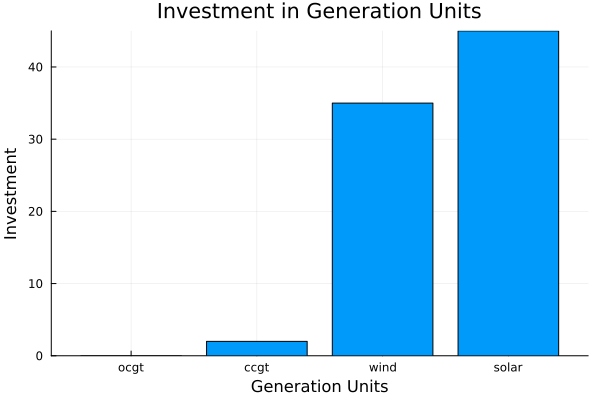

In [13]:
#plotly()
plot_investment(model)

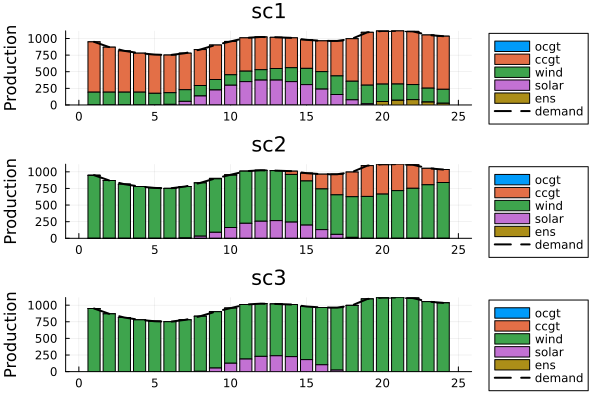

In [14]:
plot_production(model, params)

In [15]:
save_results_to_csv(output_folder, model)